# Section 1: Import Library

In [11]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Section 2: Setting Time Range and Ticker List

In [12]:
# Set time from to a certain number of years
years = 3

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

# Create a list of tickers
# tickers = ['SPY','BND','GLD','QQQ','VTI']
tickers = ['AMZN', 'VTI', 'VWO', 'VEA', 'BND', 'BJ', 'GS', 'IWM', 'FTNT']

# Section 3: Downloading Adj Price

In [13]:
# Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

display(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,VTI,VWO,VEA,BND,BJ,GS,IWM,FTNT
Date,,,,,,,,,
2021-09-29,165.056000,214.479401,45.257683,46.028759,78.271408,57.430000,354.765808,211.968079,57.765999
2021-09-30,164.251999,212.157776,45.567474,45.892422,78.253113,54.919998,348.442749,209.981094,58.408001
2021-10-01,164.162994,215.081314,45.594807,46.028759,78.519112,53.290001,350.258545,213.369568,59.599998
2021-10-04,159.488998,211.842499,44.966106,45.601555,78.464073,54.259998,344.866394,211.430542,57.773998
2021-10-05,161.050003,213.820190,45.394356,45.865150,78.271446,54.509998,355.613861,212.160065,59.703999
...,...,...,...,...,...,...,...,...,...
2024-09-23,193.880005,281.292206,45.660000,52.160000,75.250000,81.480003,497.410004,220.009247,77.440002
2024-09-24,193.960007,282.000031,47.250000,52.480000,75.339996,82.040001,498.019989,220.378006,77.459999
2024-09-25,192.529999,281.072876,46.770000,52.150002,75.059998,82.139999,491.140015,217.690002,76.610001


# Section 4: Calculate Daily Log Returns

In [14]:
### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

                AMZN       VTI       VWO       VEA       BND        BJ  \
Date                                                                     
2021-09-30 -0.004883 -0.010883  0.006822 -0.002966 -0.000234 -0.044689   
2021-10-01 -0.000542  0.013686  0.000600  0.002966  0.003393 -0.030129   
2021-10-04 -0.028885 -0.015173 -0.013885 -0.009325 -0.000701  0.018039   
2021-10-05  0.009740  0.009292  0.009479  0.005764 -0.002458  0.004597   
2021-10-06  0.012652  0.004147 -0.003821 -0.007359  0.000469 -0.012553   
...              ...       ...       ...       ...       ...       ...   
2024-09-23  0.011830  0.002484  0.008136  0.004034 -0.000664  0.006032   
2024-09-24  0.000413  0.002513  0.034230  0.006116  0.001195  0.006849   
2024-09-25 -0.007400 -0.003293 -0.010211 -0.006308 -0.003723  0.001218   
2024-09-26 -0.007141  0.004459  0.031361  0.022000  0.000000 -0.000974   
2024-09-27 -0.016828 -0.000989 -0.000207 -0.006209  0.002927 -0.000488   

                  GS       IWM      F

# Section 5: Defining Functions to Calculate Portfolio Expected Return and Standard Deviation

In [15]:
# Create a function that will be used to calculate portfolio expected return

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

# Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

# Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
display(log_returns)
display(cov_matrix)

,AMZN,VTI,VWO,VEA,BND,BJ,GS,IWM,FTNT
Date,,,,,,,,,
2021-09-30,-0.004883,-0.010883,0.006822,-0.002966,-0.000234,-0.044689,-0.017984,-0.009418,0.011053
2021-10-01,-0.000542,0.013686,0.000600,0.002966,0.003393,-0.030129,0.005198,0.016008,0.020203
2021-10-04,-0.028885,-0.015173,-0.013885,-0.009325,-0.000701,0.018039,-0.015515,-0.009129,-0.031117
2021-10-05,0.009740,0.009292,0.009479,0.005764,-0.002458,0.004597,0.030688,0.003444,0.032860
2021-10-06,0.012652,0.004147,-0.003821,-0.007359,0.000469,-0.012553,0.005789,-0.005217,0.010928
...,...,...,...,...,...,...,...,...,...
2024-09-23,0.011830,0.002484,0.008136,0.004034,-0.000664,0.006032,-0.002049,-0.003662,0.008559
2024-09-24,0.000413,0.002513,0.034230,0.006116,0.001195,0.006849,0.001226,0.001675,0.000258
2024-09-25,-0.007400,-0.003293,-0.010211,-0.006308,-0.003723,0.001218,-0.013911,-0.012272,-0.011034


,AMZN,VTI,VWO,VEA,BND,BJ,GS,IWM,FTNT
AMZN,0.000575,0.000199,0.000126,0.000145,0.000020,0.000115,0.000166,0.000203,0.000281
VTI,0.000199,0.000130,0.000087,0.000102,0.000012,0.000078,0.000125,0.000149,0.000181
VWO,0.000126,0.000087,0.000121,0.000094,0.000009,0.000036,0.000091,0.000107,0.000113
VEA,0.000145,0.000102,0.000094,0.000113,0.000013,0.000057,0.000116,0.000124,0.000133
BND,0.000020,0.000012,0.000009,0.000013,0.000019,0.000005,0.000009,0.000015,0.000015
BJ,0.000115,0.000078,0.000036,0.000057,0.000005,0.000451,0.000070,0.000098,0.000088
GS,0.000166,0.000125,0.000091,0.000116,0.000009,0.000070,0.000264,0.000164,0.000128
IWM,0.000203,0.000149,0.000107,0.000124,0.000015,0.000098,0.000164,0.000215,0.000188
FTNT,0.000281,0.000181,0.000113,0.000133,0.000015,0.000088,0.000128,0.000188,0.000865


# Section 6: Calculating Portfolio Expected Return and Standard Deviation

In [16]:
# Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 100000
weights = np.array([1/len(tickers)]*len(tickers))

portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

display(portfolio_expected_return)
display(portfolio_std_dev)

0.00023580592131150512

0.011155181572263029

# Section 7: Define function for Monte Carlo Simulation

In [17]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 100

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

# Section 8: Running Monte Carlo Simulation

In [18]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [19]:
# Calculate VaR

# Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

15984.010461498117


# Section 9: Data Visualization

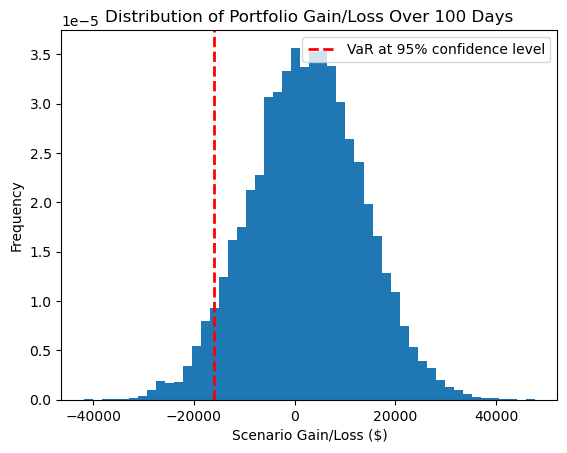

In [20]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()